# Convolutional neural network for image classification

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
import zipfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.9.2'

## Loading the images

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/Computer Vision/Computer Vision Masterclass/Datasets/homer_bart_2.zip'
zib_object = zipfile.ZipFile(file = path, mode = 'r')
zib_object.extractall('./')
zib_object.close()

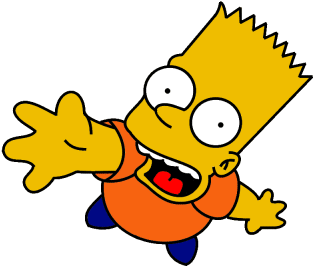

In [4]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart103.bmp')

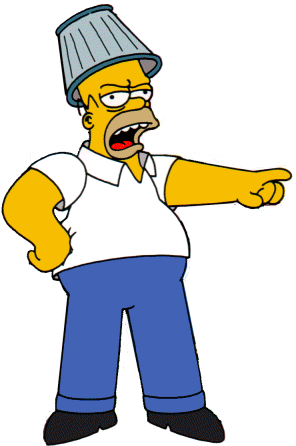

In [5]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer32.bmp')

## Train and test set

In [6]:
train_generator = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 7,
                                     horizontal_flip = True,
                                     zoom_range = 0.2)

In [7]:
train_dataset = train_generator.flow_from_directory('/content/homer_bart_2/training_set',
                                                    target_size = (64,64),
                                                    batch_size = 8,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 215 images belonging to 2 classes.


In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [10]:
test_generator = ImageDataGenerator(rescale = 1./255)

In [11]:
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set',
                                                  target_size = (64, 64),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 54 images belonging to 2 classes.


## Building and training the neural network

In [12]:
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (64, 64, 3)))
network.add(MaxPool2D(pool_size = (2,2)))

network.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
network.add(MaxPool2D(pool_size = (2,2)))

network.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
network.add(MaxPool2D(pool_size = (2,2)))

network.add(Flatten())

network.add(Dense(units = 577, activation = 'relu'))
network.add(Dense(units = 577, activation = 'relu'))
network.add(Dense(units = 2, activation = 'softmax'))

In [13]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [14]:
(1152 + 2) / 2

577.0

In [15]:
network.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = network.fit_generator(train_dataset, epochs = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
27/27 [==============================] - 3s 72ms/step - loss: 0.7172 - accuracy: 0.5628
Epoch 2/50
27/27 [==============================] - 2s 71ms/step - loss: 0.6537 - accuracy: 0.6140
Epoch 3/50
27/27 [==============================] - 2s 72ms/step - loss: 0.5605 - accuracy: 0.7209
Epoch 4/50
27/27 [==============================] - 2s 70ms/step - loss: 0.5130 - accuracy: 0.7814
Epoch 5/50
27/27 [==============================] - 2s 69ms/step - loss: 0.5097 - accuracy: 0.7907
Epoch 6/50
27/27 [==============================] - 2s 68ms/step - loss: 0.4708 - accuracy: 0.7907
Epoch 7/50
27/27 [==============================] - 2s 69ms/step - loss: 0.4108 - accuracy: 0.8419
Epoch 8/50
27/27 [==============================] - 2s 68ms/step - loss: 0.3581 - accuracy: 0.8419
Epoch 9/50
27/27 [==============================] - 2s 68ms/step - loss: 0.2967 - accuracy: 0.8884
Epoch 10/50
27/27 [==============================] - 2s 70ms/step - loss: 0.3232 - accuracy: 0.8698
Epoch 11/

## Evaluating the neural network

In [19]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [21]:
predictions = network.predict(test_dataset)


54/54 [==============================] - 0s 6ms/step


In [22]:
predictions = np.argmax(predictions, axis = 1)

In [23]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.8518518518518519

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
print(cm)

[[24  4]
 [ 4 22]]


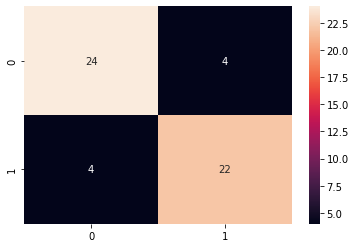

In [30]:
sns.heatmap(cm, annot=True);

In [31]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.85      0.85      0.85        26

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



## Saving and loading the model

In [32]:
model_json = network.to_json()
with open('network.json', 'w') as json_file:
  json_file.write(model_json)

In [33]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights.hdf5')
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "d

In [35]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/weights.hdf5')
network_loaded.compile(optimizer = 'Adam', loss = 'binary_cross_entropy', metrics = ['accuracy'])

In [36]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

## Classify One Single Image

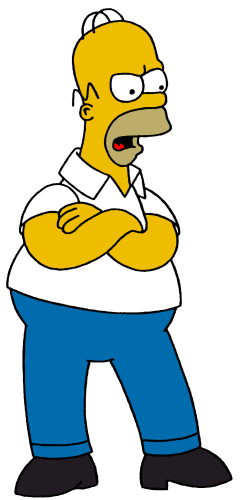

In [78]:
image = cv2.imread('/content/homer_bart_2/test_set/homer/homer13.bmp')
cv2_imshow(image)

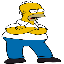

In [79]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

In [80]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [81]:
image = image / 255
image

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [82]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [83]:
result = network.predict(image)
result

1/1 [==============================] - 0s 21ms/step


array([[0.2056001, 0.7943999]], dtype=float32)

In [84]:
result = np.argmax(result)
result

1

In [85]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Homer
